# Setup

In [ ]:
!pip install demoji

     |████████████████████████████████| 42 kB 1.1 MB/s 


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import uniform

import nltk
from nltk.corpus import wordnet as wn
from nltk.corpus import words
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem.porter import *
from nltk.stem import LancasterStemmer
from nltk.corpus import stopwords

import re
import demoji

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ceo_tweets = pd.read_csv('/content/drive/MyDrive/ceo_tweets.csv').iloc[:,1:]

In [ ]:
ceo_tweets.head(5)

,username,id,date,tweet,retweets,likes
0,@elonmusk,1490909887676973056,2022-02-08 04:46:31,@teslaownersSV @boringcompany @mayemusk @kimba...,188,4193
1,@elonmusk,1490832993258450944,2022-02-07 23:40:58,Most news outlets attempt to answer the questi...,11029,96629
2,@elonmusk,1490831891640946689,2022-02-07 23:36:35,@GailAlfarATX So hard to find out what’s going...,828,9829
3,@elonmusk,1490831581606416384,2022-02-07 23:35:22,"@GuiStroz @JohnnaCrider1 True, careless negati...",420,4962
4,@elonmusk,1490830963290427392,2022-02-07 23:32:54,@stevenmarkryan Sadly true,162,4592


In [ ]:
labelled_tweets = pd.read_csv('/content/drive/MyDrive/labelled_tweet_sentiments.csv')

In [ ]:
labelled_tweets.head(5)

,Tweet,Target
0,An inspiration in all aspects: Fashion,1
1,fitness,1
2,beauty and personality. :)KISSES TheFashionIcon,1
3,Apka Apna Awam Ka Channel Frankline Tv Aam Adm...,1
4,Beautiful album from the greatest unsung guit...,1


# Clean Methods

In [ ]:
# cleaning
# replace emoticons with text
def replace_emoticons(text):
  emoji = demoji.findall(text)
  for i in emoji.keys():
    text = text.replace(i, emoji[i] + " ")
  return text.strip()

# step 1: removing mentions and hashtags
def clean_tweet_split(tweet):
        # remove emojis
        tweet = replace_emoticons(tweet)
        # removing mentions
        p = ' '.join(re.sub("(?<=^|(?<=[^a-zA-Z0-9-_\.]))@([A-Za-z0-9_]+[A-Za-z0-9_]+)", " ", tweet).split()) 

        # removing hashtags
        s = ' '.join(re.sub("(?<=^|(?<=[^a-zA-Z0-9-_\.]))#([A-Za-z]+[A-Za-z0-9_]+)", " ", p).split())

        # removing punctuation
        t = ' '.join(re.sub(r'[^\w\s]', '', s).split())

        # removing trailing / extra whitespaces
        v = ' '.join(re.sub(' +', ' ', t).split())
        return ' '.join(re.sub("(\w+:\/\/\S+)", " ", v).split())

# remove hyperlinks
def remove_links(tweet):
        return ' '.join(re.sub("(\w+:\/\/\S+)", " ", tweet).split())

In [ ]:
# stemming
st = nltk.PorterStemmer()
def stemming(data):
    text = [st.stem(word) for word in data]
    return data

# lemmatisation
lemma = nltk.wordnet.WordNetLemmatizer()
def lemmatize(text):
    return lemma.lemmatize(text)

In [ ]:
# filter for tokens that are not empty
def filter_filled_tokens(data):
    return len(data.tokens) != 0

### Stopwords

Define our stopwords - removing words with negative/positive connotations (eg: not)

In [ ]:
import nltk
nltk.download('stopwords')

stop = stopwords.words('english')
stop = stop + ['rt','amp', 'apple', 'google', 'microsoft', 'amazon', 'tesla']
unwanted = [ 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'but',
 'while',
 'against',
 'out',
 'no',
 'nor',
 'not',
 'very',
 'can',
 'will',
 'just',
 'don',
 "don't",
 'should',
 "should've",
 'ain',
 'aren',
 "aren't",
 'couldn',
 "couldn't",
 'didn',
 "didn't",
 'doesn',
 "doesn't",
 'hadn',
 "hadn't",
 'hasn',
 "hasn't",
 'haven',
 "haven't",
 'isn',
 "isn't",
 'mightn',
 "mightn't",
 'mustn',
 "mustn't",
 'needn',
 "needn't",
 'shan',
 "shan't",
 'shouldn',
 "shouldn't",
 'wasn',
 "wasn't",
 'weren',
 "weren't",
 'won',
 "won't",
 'wouldn',
 "wouldn't"]
unwanted_stopwords = [ele for ele in stop if ele not in unwanted]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
unwanted_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'a',
 'an',
 'the',
 'and',
 'if',
 'or',
 'because',
 'as',
 'until',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'only',
 'own',
 'same',
 'so',
 'than',
 'too',
 

# Pre-processing ceo tweets dataset

Steps:
1. Remove http links
2. Remove xxx.com links
3. clean_tweet_split (decode emojis, remove mentions, hashtags, punctuations, trailing and extra whitespaces)
4. Remove non-ascii characters
5. Remove digits and th/rd/st/nd
6. Tokenise
7. Remove words that are in our defined stopwords list
8. Stemming
9. Lemmatising
10. Extract necessary columns and rename columns
11. Filter out rows with empty tokens

Schema:

cleaned_tweets: Before tokenisation 

tokens: Processed tokens (after stemming, lematising, removing stopwords)


In [ ]:
# remove http links
ceo_tweets["tweet_clean"] = ceo_tweets["tweet"].apply(lambda tweet: remove_links(tweet))

In [ ]:
# remove xxx.com
ceo_tweets["tweet_clean"] = ceo_tweets["tweet_clean"].str.replace(r'[a-zA-Z0-9.]*\.com\b', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [ ]:
# further process to decode emojis, remove mentions etc
ceo_tweets["tweet_clean"] = ceo_tweets["tweet_clean"].apply(lambda tweet: clean_tweet_split(tweet))

In [ ]:
# remove any non-ascii characters
ceo_tweets["tweet_clean"] = ceo_tweets["tweet_clean"].apply(lambda tweet: tweet.encode("ascii", "ignore").decode())

In [ ]:
# remove digits
ceo_tweets["tweet_clean_remove_num"] = ceo_tweets["tweet_clean"].str.replace('\d+', '')
# remove th, rd, st, nd
ceo_tweets["tweet_clean_remove_num"] = ceo_tweets["tweet_clean_remove_num"].str.replace(r'\b th\b', '')
ceo_tweets["tweet_clean_remove_num"] = ceo_tweets["tweet_clean_remove_num"].str.replace(r'\b st\b', '')
ceo_tweets["tweet_clean_remove_num"] = ceo_tweets["tweet_clean_remove_num"].str.replace(r'\b rd\b', '')
ceo_tweets["tweet_clean_remove_num"] = ceo_tweets["tweet_clean_remove_num"].str.replace(r'\b nd\b', '')
ceo_tweets

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys


,username,id,date,tweet,retweets,likes,tweet_clean,tweet_clean_remove_num
0,@elonmusk,1490909887676973056,2022-02-08 04:46:31,@teslaownersSV @boringcompany @mayemusk @kimba...,188,4193,Yup,Yup
1,@elonmusk,1490832993258450944,2022-02-07 23:40:58,Most news outlets attempt to answer the questi...,11029,96629,Most news outlets attempt to answer the questi...,Most news outlets attempt to answer the questi...
2,@elonmusk,1490831891640946689,2022-02-07 23:36:35,@GailAlfarATX So hard to find out what’s going...,828,9829,So hard to find out whats going on in the worl...,So hard to find out whats going on in the worl...
3,@elonmusk,1490831581606416384,2022-02-07 23:35:22,"@GuiStroz @JohnnaCrider1 True, careless negati...",420,4962,True careless negativity destruction is much h...,True careless negativity destruction is much h...
4,@elonmusk,1490830963290427392,2022-02-07 23:32:54,@stevenmarkryan Sadly true,162,4592,Sadly true,Sadly true
...,...,...,...,...,...,...,...,...
5770,@sundarpichai,1517273958,2009-04-14 15:15:40,Happy New Year http://tinyurl.com/d3dj3z,0,2,Happy New Year,Happy New Year
5771,@sundarpichai,1435641821,2009-04-02 01:50:55,"enjoying 3d browsing with Chrome, it is awesom...",0,2,enjoying 3d browsing with Chrome it is awesome,enjoying d browsing with Chrome it is awesome
5772,@sundarpichai,1205396897,2009-02-13 05:08:29,thinking abt twittering again....,0,4,thinking abt twittering again,thinking abt twittering again
5773,@sundarpichai,774770442,2008-03-21 03:26:16,enjoying a rainy day in beijing (clears out al...,1,5,enjoying a rainy day in beijing clears out all...,enjoying a rainy day in beijing clears out all...


In [ ]:
# tokenise the cleaned tweets
ceo_tweets["tweet_tokens"] = ceo_tweets["tweet_clean_remove_num"].apply(lambda each_post: word_tokenize(re.sub(r'[^\w\s]',' ',each_post.lower())))

In [ ]:
# remove stopwords
ceo_tweets["tweet_tokens"] = ceo_tweets["tweet_tokens"].apply(lambda list_of_words: [x for x in list_of_words if x not in unwanted_stopwords])

In [ ]:
# stemming
ceo_tweets["tweet_tokens_stem_lem"] = ceo_tweets['tweet_tokens'].apply(lambda list_of_words: stemming(list_of_words))

In [ ]:
# lemmatize
ceo_tweets["tweet_tokens_stem_lem"] = ceo_tweets["tweet_tokens_stem_lem"].apply(lambda list_of_words: [lemmatize(x) for x in list_of_words])

In [ ]:
ceo_tweets

,username,id,date,tweet,retweets,likes,tweet_clean,tweet_clean_remove_num,tweet_tokens,tweet_tokens_stem_lem
0,@elonmusk,1490909887676973056,2022-02-08 04:46:31,@teslaownersSV @boringcompany @mayemusk @kimba...,188,4193,Yup,Yup,[yup],[yup]
1,@elonmusk,1490832993258450944,2022-02-07 23:40:58,Most news outlets attempt to answer the questi...,11029,96629,Most news outlets attempt to answer the questi...,Most news outlets attempt to answer the questi...,"[news, outlets, attempt, answer, question, wor...","[news, outlet, attempt, answer, question, wors..."
2,@elonmusk,1490831891640946689,2022-02-07 23:36:35,@GailAlfarATX So hard to find out what’s going...,828,9829,So hard to find out whats going on in the worl...,So hard to find out whats going on in the worl...,"[hard, find, out, whats, going, world, without...","[hard, find, out, whats, going, world, without..."
3,@elonmusk,1490831581606416384,2022-02-07 23:35:22,"@GuiStroz @JohnnaCrider1 True, careless negati...",420,4962,True careless negativity destruction is much h...,True careless negativity destruction is much h...,"[true, careless, negativity, destruction, much...","[true, careless, negativity, destruction, much..."
4,@elonmusk,1490830963290427392,2022-02-07 23:32:54,@stevenmarkryan Sadly true,162,4592,Sadly true,Sadly true,"[sadly, true]","[sadly, true]"
...,...,...,...,...,...,...,...,...,...,...
5770,@sundarpichai,1517273958,2009-04-14 15:15:40,Happy New Year http://tinyurl.com/d3dj3z,0,2,Happy New Year,Happy New Year,"[happy, new, year]","[happy, new, year]"
5771,@sundarpichai,1435641821,2009-04-02 01:50:55,"enjoying 3d browsing with Chrome, it is awesom...",0,2,enjoying 3d browsing with Chrome it is awesome,enjoying d browsing with Chrome it is awesome,"[enjoying, browsing, chrome, awesome]","[enjoying, browsing, chrome, awesome]"
5772,@sundarpichai,1205396897,2009-02-13 05:08:29,thinking abt twittering again....,0,4,thinking abt twittering again,thinking abt twittering again,"[thinking, abt, twittering]","[thinking, abt, twittering]"
5773,@sundarpichai,774770442,2008-03-21 03:26:16,enjoying a rainy day in beijing (clears out al...,1,5,enjoying a rainy day in beijing clears out all...,enjoying a rainy day in beijing clears out all...,"[enjoying, rainy, day, beijing, clears, out, p...","[enjoying, rainy, day, beijing, clear, out, po..."


In [ ]:
cleaned_ceo_tweets = ceo_tweets[["username", "id", "date", "tweet", "retweets", "likes", "tweet_clean_remove_num", "tweet_tokens_stem_lem"]]
cleaned_ceo_tweets

,username,id,date,tweet,retweets,likes,tweet_clean_remove_num,tweet_tokens_stem_lem
0,@elonmusk,1490909887676973056,2022-02-08 04:46:31,@teslaownersSV @boringcompany @mayemusk @kimba...,188,4193,Yup,[yup]
1,@elonmusk,1490832993258450944,2022-02-07 23:40:58,Most news outlets attempt to answer the questi...,11029,96629,Most news outlets attempt to answer the questi...,"[news, outlet, attempt, answer, question, wors..."
2,@elonmusk,1490831891640946689,2022-02-07 23:36:35,@GailAlfarATX So hard to find out what’s going...,828,9829,So hard to find out whats going on in the worl...,"[hard, find, out, whats, going, world, without..."
3,@elonmusk,1490831581606416384,2022-02-07 23:35:22,"@GuiStroz @JohnnaCrider1 True, careless negati...",420,4962,True careless negativity destruction is much h...,"[true, careless, negativity, destruction, much..."
4,@elonmusk,1490830963290427392,2022-02-07 23:32:54,@stevenmarkryan Sadly true,162,4592,Sadly true,"[sadly, true]"
...,...,...,...,...,...,...,...,...
5770,@sundarpichai,1517273958,2009-04-14 15:15:40,Happy New Year http://tinyurl.com/d3dj3z,0,2,Happy New Year,"[happy, new, year]"
5771,@sundarpichai,1435641821,2009-04-02 01:50:55,"enjoying 3d browsing with Chrome, it is awesom...",0,2,enjoying d browsing with Chrome it is awesome,"[enjoying, browsing, chrome, awesome]"
5772,@sundarpichai,1205396897,2009-02-13 05:08:29,thinking abt twittering again....,0,4,thinking abt twittering again,"[thinking, abt, twittering]"
5773,@sundarpichai,774770442,2008-03-21 03:26:16,enjoying a rainy day in beijing (clears out al...,1,5,enjoying a rainy day in beijing clears out all...,"[enjoying, rainy, day, beijing, clear, out, po..."


In [ ]:
cleaned_ceo_tweets_rename = cleaned_ceo_tweets.rename({"tweet_clean_remove_num": "cleaned_tweets", "tweet_tokens_stem_lem": "tokens"}, axis = 1)
cleaned_ceo_tweets_rename

,username,id,date,tweet,retweets,likes,cleaned_tweets,tokens
0,@elonmusk,1490909887676973056,2022-02-08 04:46:31,@teslaownersSV @boringcompany @mayemusk @kimba...,188,4193,Yup,[yup]
1,@elonmusk,1490832993258450944,2022-02-07 23:40:58,Most news outlets attempt to answer the questi...,11029,96629,Most news outlets attempt to answer the questi...,"[news, outlet, attempt, answer, question, wors..."
2,@elonmusk,1490831891640946689,2022-02-07 23:36:35,@GailAlfarATX So hard to find out what’s going...,828,9829,So hard to find out whats going on in the worl...,"[hard, find, out, whats, going, world, without..."
3,@elonmusk,1490831581606416384,2022-02-07 23:35:22,"@GuiStroz @JohnnaCrider1 True, careless negati...",420,4962,True careless negativity destruction is much h...,"[true, careless, negativity, destruction, much..."
4,@elonmusk,1490830963290427392,2022-02-07 23:32:54,@stevenmarkryan Sadly true,162,4592,Sadly true,"[sadly, true]"
...,...,...,...,...,...,...,...,...
5770,@sundarpichai,1517273958,2009-04-14 15:15:40,Happy New Year http://tinyurl.com/d3dj3z,0,2,Happy New Year,"[happy, new, year]"
5771,@sundarpichai,1435641821,2009-04-02 01:50:55,"enjoying 3d browsing with Chrome, it is awesom...",0,2,enjoying d browsing with Chrome it is awesome,"[enjoying, browsing, chrome, awesome]"
5772,@sundarpichai,1205396897,2009-02-13 05:08:29,thinking abt twittering again....,0,4,thinking abt twittering again,"[thinking, abt, twittering]"
5773,@sundarpichai,774770442,2008-03-21 03:26:16,enjoying a rainy day in beijing (clears out al...,1,5,enjoying a rainy day in beijing clears out all...,"[enjoying, rainy, day, beijing, clear, out, po..."


In [ ]:
# token strings -> convert list of tokens into string
# cleaned_ceo_tweets_rename['tokens_string'] = cleaned_ceo_tweets_rename.tokens.apply(lambda x: ' '.join([str(i) for i in x]))
# cleaned_ceo_tweets_rename

In [ ]:
#cleaned_ceo_tweets_rename.to_csv("/content/drive/MyDrive/Data Cleaning/cleaned_ceo_tweets_full.csv", index = False)

In [ ]:
## remove empty tokens
filled_ceo_tweets = cleaned_ceo_tweets_rename[cleaned_ceo_tweets_rename.apply(lambda x: filter_filled_tokens(x), axis = 1)]
filled_ceo_tweets

,username,id,date,tweet,retweets,likes,cleaned_tweets,tokens
0,@elonmusk,1490909887676973056,2022-02-08 04:46:31,@teslaownersSV @boringcompany @mayemusk @kimba...,188,4193,Yup,[yup]
1,@elonmusk,1490832993258450944,2022-02-07 23:40:58,Most news outlets attempt to answer the questi...,11029,96629,Most news outlets attempt to answer the questi...,"[news, outlet, attempt, answer, question, wors..."
2,@elonmusk,1490831891640946689,2022-02-07 23:36:35,@GailAlfarATX So hard to find out what’s going...,828,9829,So hard to find out whats going on in the worl...,"[hard, find, out, whats, going, world, without..."
3,@elonmusk,1490831581606416384,2022-02-07 23:35:22,"@GuiStroz @JohnnaCrider1 True, careless negati...",420,4962,True careless negativity destruction is much h...,"[true, careless, negativity, destruction, much..."
4,@elonmusk,1490830963290427392,2022-02-07 23:32:54,@stevenmarkryan Sadly true,162,4592,Sadly true,"[sadly, true]"
...,...,...,...,...,...,...,...,...
5770,@sundarpichai,1517273958,2009-04-14 15:15:40,Happy New Year http://tinyurl.com/d3dj3z,0,2,Happy New Year,"[happy, new, year]"
5771,@sundarpichai,1435641821,2009-04-02 01:50:55,"enjoying 3d browsing with Chrome, it is awesom...",0,2,enjoying d browsing with Chrome it is awesome,"[enjoying, browsing, chrome, awesome]"
5772,@sundarpichai,1205396897,2009-02-13 05:08:29,thinking abt twittering again....,0,4,thinking abt twittering again,"[thinking, abt, twittering]"
5773,@sundarpichai,774770442,2008-03-21 03:26:16,enjoying a rainy day in beijing (clears out al...,1,5,enjoying a rainy day in beijing clears out all...,"[enjoying, rainy, day, beijing, clear, out, po..."


In [ ]:
filled_ceo_tweets.to_csv("/content/drive/MyDrive/Data Cleaning/cleaned_ceo_tweets_with_tokens.csv", index = False)

## EDA: WordCloud on tokens

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

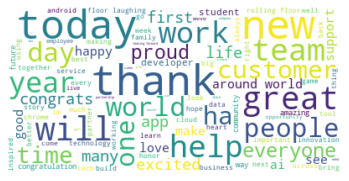

In [ ]:
import ast
ceo_tweets = pd.read_csv('/content/drive/MyDrive/Data Cleaning/cleaned_ceo_tweets_with_tokens.csv')
ceo_tweets0 = ceo_tweets.copy()

ceo_tweets0['cleaned_tweets'] =  ceo_tweets0.tokens.values.tolist()
ceo_tweets0['cleaned_tweets'] = [ast.literal_eval(x) for x in ceo_tweets0['cleaned_tweets']]
ceo_tweets0['cleaned_tweets'] = [' '.join(map(str, l)) for l in ceo_tweets0['cleaned_tweets']]

# Word cloud
text = " ".join(review for review in ceo_tweets0.cleaned_tweets)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Pre-processing labelled tweets sentiment dataset

Steps:
1. Remove http links
2. Remove xxx.com links
3. clean_tweet_split (decode emojis, remove mentions, hashtags, punctuations, trailing and extra whitespaces)
4. Remove non-ascii characters
5. Remove digits and th/rd/st/nd
6. Tokenise
7. Remove words that are in our defined stopwords list
8. Stemming
9. Lemmatising
10. Extract necessary columns and rename columns
11. Filter out rows with empty tokens

Schema:

cleaned_tweets: Before tokenisation 

tokens: Processed tokens (after stemming, lematising, removing stopwords)


In [ ]:
labelled_tweets['Tweet'] = labelled_tweets['Tweet'].apply(lambda x: str(x))
labelled_tweets

,Tweet,Target
0,An inspiration in all aspects: Fashion,1
1,fitness,1
2,beauty and personality. :)KISSES TheFashionIcon,1
3,Apka Apna Awam Ka Channel Frankline Tv Aam Adm...,1
4,Beautiful album from the greatest unsung guit...,1
...,...,...
3857,IDFC official Vikram Limaye,0
3858,former captain Diana Edulji are others in pan...,0
3859,Supreme Court names former CAG as head of 4-me...,0
3860,Court summons CM suspended BJP MP as accused i...,0


In [ ]:
# remove http links
labelled_tweets["tweet_clean"] = labelled_tweets["Tweet"].apply(lambda tweet: remove_links(tweet))
labelled_tweets

,Tweet,Target,tweet_clean
0,An inspiration in all aspects: Fashion,1,An inspiration in all aspects: Fashion
1,fitness,1,fitness
2,beauty and personality. :)KISSES TheFashionIcon,1,beauty and personality. :)KISSES TheFashionIcon
3,Apka Apna Awam Ka Channel Frankline Tv Aam Adm...,1,Apka Apna Awam Ka Channel Frankline Tv Aam Adm...
4,Beautiful album from the greatest unsung guit...,1,Beautiful album from the greatest unsung guita...
...,...,...,...
3857,IDFC official Vikram Limaye,0,IDFC official Vikram Limaye
3858,former captain Diana Edulji are others in pan...,0,former captain Diana Edulji are others in pane...
3859,Supreme Court names former CAG as head of 4-me...,0,Supreme Court names former CAG as head of 4-me...
3860,Court summons CM suspended BJP MP as accused i...,0,Court summons CM suspended BJP MP as accused i...


In [ ]:
# remove xxx.com
labelled_tweets["tweet_clean"] = labelled_tweets["tweet_clean"].str.replace(r'[a-zA-Z0-9.]*\.com\b', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [ ]:
# further process to decode emojis, remove mentions etc
labelled_tweets["tweet_clean"] = labelled_tweets["tweet_clean"].apply(lambda tweet: clean_tweet_split(tweet))

In [ ]:
# remove any non-ascii characters
labelled_tweets["tweet_clean"] = labelled_tweets["tweet_clean"].apply(lambda tweet: tweet.encode("ascii", "ignore").decode())

In [ ]:
# remove digits
labelled_tweets["tweet_clean_remove_num"] = labelled_tweets["tweet_clean"].str.replace('\d+', '')
# remove th, rd, st, nd
labelled_tweets["tweet_clean_remove_num"] = labelled_tweets["tweet_clean_remove_num"].str.replace(r'\b th\b', '')
labelled_tweets["tweet_clean_remove_num"] = labelled_tweets["tweet_clean_remove_num"].str.replace(r'\b st\b', '')
labelled_tweets["tweet_clean_remove_num"] = labelled_tweets["tweet_clean_remove_num"].str.replace(r'\b rd\b', '')
labelled_tweets["tweet_clean_remove_num"] = labelled_tweets["tweet_clean_remove_num"].str.replace(r'\b nd\b', '')
labelled_tweets

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys


,Tweet,Target,tweet_clean,tweet_clean_remove_num
0,An inspiration in all aspects: Fashion,1,An inspiration in all aspects Fashion,An inspiration in all aspects Fashion
1,fitness,1,fitness,fitness
2,beauty and personality. :)KISSES TheFashionIcon,1,beauty and personality KISSES TheFashionIcon,beauty and personality KISSES TheFashionIcon
3,Apka Apna Awam Ka Channel Frankline Tv Aam Adm...,1,Apka Apna Awam Ka Channel Frankline Tv Aam Adm...,Apka Apna Awam Ka Channel Frankline Tv Aam Adm...
4,Beautiful album from the greatest unsung guit...,1,Beautiful album from the greatest unsung guita...,Beautiful album from the greatest unsung guita...
...,...,...,...,...
3857,IDFC official Vikram Limaye,0,IDFC official Vikram Limaye,IDFC official Vikram Limaye
3858,former captain Diana Edulji are others in pan...,0,former captain Diana Edulji are others in pane...,former captain Diana Edulji are others in pane...
3859,Supreme Court names former CAG as head of 4-me...,0,Supreme Court names former CAG as head of 4mem...,Supreme Court names former CAG as head of memb...
3860,Court summons CM suspended BJP MP as accused i...,0,Court summons CM suspended BJP MP as accused i...,Court summons CM suspended BJP MP as accused i...


In [ ]:
# tokenise the cleaned tweets
labelled_tweets["tweet_tokens"] = labelled_tweets["tweet_clean_remove_num"].apply(lambda each_post: word_tokenize(re.sub(r'[^\w\s]',' ',each_post.lower())))

In [ ]:
# remove stopwords
labelled_tweets["tweet_tokens"] = labelled_tweets["tweet_tokens"].apply(lambda list_of_words: [x for x in list_of_words if x not in unwanted_stopwords])

In [ ]:
# stemming
labelled_tweets["tweet_tokens_stem_lem"] = labelled_tweets['tweet_tokens'].apply(lambda list_of_words: stemming(list_of_words))

In [ ]:
# lemmatize
labelled_tweets["tweet_tokens_stem_lem"] = labelled_tweets["tweet_tokens_stem_lem"].apply(lambda list_of_words: [lemmatize(x) for x in list_of_words])

In [ ]:
labelled_tweets

,Tweet,Target,tweet_clean,tweet_clean_remove_num,tweet_tokens,tweet_tokens_stem_lem
0,An inspiration in all aspects: Fashion,1,An inspiration in all aspects Fashion,An inspiration in all aspects Fashion,"[inspiration, aspects, fashion]","[inspiration, aspect, fashion]"
1,fitness,1,fitness,fitness,[fitness],[fitness]
2,beauty and personality. :)KISSES TheFashionIcon,1,beauty and personality KISSES TheFashionIcon,beauty and personality KISSES TheFashionIcon,"[beauty, personality, kisses, thefashionicon]","[beauty, personality, kiss, thefashionicon]"
3,Apka Apna Awam Ka Channel Frankline Tv Aam Adm...,1,Apka Apna Awam Ka Channel Frankline Tv Aam Adm...,Apka Apna Awam Ka Channel Frankline Tv Aam Adm...,"[apka, apna, awam, ka, channel, frankline, tv,...","[apka, apna, awam, ka, channel, frankline, tv,..."
4,Beautiful album from the greatest unsung guit...,1,Beautiful album from the greatest unsung guita...,Beautiful album from the greatest unsung guita...,"[beautiful, album, greatest, unsung, guitar, g...","[beautiful, album, greatest, unsung, guitar, g..."
...,...,...,...,...,...,...
3857,IDFC official Vikram Limaye,0,IDFC official Vikram Limaye,IDFC official Vikram Limaye,"[idfc, official, vikram, limaye]","[idfc, official, vikram, limaye]"
3858,former captain Diana Edulji are others in pan...,0,former captain Diana Edulji are others in pane...,former captain Diana Edulji are others in pane...,"[former, captain, diana, edulji, others, panel...","[former, captain, diana, edulji, others, panel..."
3859,Supreme Court names former CAG as head of 4-me...,0,Supreme Court names former CAG as head of 4mem...,Supreme Court names former CAG as head of memb...,"[supreme, court, names, former, cag, head, mem...","[supreme, court, name, former, cag, head, memb..."
3860,Court summons CM suspended BJP MP as accused i...,0,Court summons CM suspended BJP MP as accused i...,Court summons CM suspended BJP MP as accused i...,"[court, summons, cm, suspended, bjp, mp, accus...","[court, summons, cm, suspended, bjp, mp, accus..."


In [ ]:
cleaned_labelled_tweets = labelled_tweets[["Tweet", "Target", "tweet_clean_remove_num", "tweet_tokens_stem_lem"]]
cleaned_labelled_tweets

,Tweet,Target,tweet_clean_remove_num,tweet_tokens_stem_lem
0,An inspiration in all aspects: Fashion,1,An inspiration in all aspects Fashion,"[inspiration, aspect, fashion]"
1,fitness,1,fitness,[fitness]
2,beauty and personality. :)KISSES TheFashionIcon,1,beauty and personality KISSES TheFashionIcon,"[beauty, personality, kiss, thefashionicon]"
3,Apka Apna Awam Ka Channel Frankline Tv Aam Adm...,1,Apka Apna Awam Ka Channel Frankline Tv Aam Adm...,"[apka, apna, awam, ka, channel, frankline, tv,..."
4,Beautiful album from the greatest unsung guit...,1,Beautiful album from the greatest unsung guita...,"[beautiful, album, greatest, unsung, guitar, g..."
...,...,...,...,...
3857,IDFC official Vikram Limaye,0,IDFC official Vikram Limaye,"[idfc, official, vikram, limaye]"
3858,former captain Diana Edulji are others in pan...,0,former captain Diana Edulji are others in pane...,"[former, captain, diana, edulji, others, panel..."
3859,Supreme Court names former CAG as head of 4-me...,0,Supreme Court names former CAG as head of memb...,"[supreme, court, name, former, cag, head, memb..."
3860,Court summons CM suspended BJP MP as accused i...,0,Court summons CM suspended BJP MP as accused i...,"[court, summons, cm, suspended, bjp, mp, accus..."


In [ ]:
cleaned_labelled_tweets_rename = cleaned_labelled_tweets.rename({"tweet_clean_remove_num": "cleaned_tweets", "tweet_tokens_stem_lem": "tokens", "Target":"sentiments"}, axis = 1)
cleaned_labelled_tweets_rename

,Tweet,sentiments,cleaned_tweets,tokens
0,An inspiration in all aspects: Fashion,1,An inspiration in all aspects Fashion,"[inspiration, aspect, fashion]"
1,fitness,1,fitness,[fitness]
2,beauty and personality. :)KISSES TheFashionIcon,1,beauty and personality KISSES TheFashionIcon,"[beauty, personality, kiss, thefashionicon]"
3,Apka Apna Awam Ka Channel Frankline Tv Aam Adm...,1,Apka Apna Awam Ka Channel Frankline Tv Aam Adm...,"[apka, apna, awam, ka, channel, frankline, tv,..."
4,Beautiful album from the greatest unsung guit...,1,Beautiful album from the greatest unsung guita...,"[beautiful, album, greatest, unsung, guitar, g..."
...,...,...,...,...
3857,IDFC official Vikram Limaye,0,IDFC official Vikram Limaye,"[idfc, official, vikram, limaye]"
3858,former captain Diana Edulji are others in pan...,0,former captain Diana Edulji are others in pane...,"[former, captain, diana, edulji, others, panel..."
3859,Supreme Court names former CAG as head of 4-me...,0,Supreme Court names former CAG as head of memb...,"[supreme, court, name, former, cag, head, memb..."
3860,Court summons CM suspended BJP MP as accused i...,0,Court summons CM suspended BJP MP as accused i...,"[court, summons, cm, suspended, bjp, mp, accus..."


In [ ]:
#cleaned_labelled_tweets_rename.to_csv("/content/drive/MyDrive/Data Cleaning/cleaned_labelled_tweets_full.csv", index = False)

In [ ]:
## remove empty tokens
filled_labelled_tweets = cleaned_labelled_tweets_rename[cleaned_labelled_tweets_rename.apply(lambda x: filter_filled_tokens(x), axis = 1)]
filled_labelled_tweets

,Tweet,sentiments,cleaned_tweets,tokens
0,An inspiration in all aspects: Fashion,1,An inspiration in all aspects Fashion,"[inspiration, aspect, fashion]"
1,fitness,1,fitness,[fitness]
2,beauty and personality. :)KISSES TheFashionIcon,1,beauty and personality KISSES TheFashionIcon,"[beauty, personality, kiss, thefashionicon]"
3,Apka Apna Awam Ka Channel Frankline Tv Aam Adm...,1,Apka Apna Awam Ka Channel Frankline Tv Aam Adm...,"[apka, apna, awam, ka, channel, frankline, tv,..."
4,Beautiful album from the greatest unsung guit...,1,Beautiful album from the greatest unsung guita...,"[beautiful, album, greatest, unsung, guitar, g..."
...,...,...,...,...
3857,IDFC official Vikram Limaye,0,IDFC official Vikram Limaye,"[idfc, official, vikram, limaye]"
3858,former captain Diana Edulji are others in pan...,0,former captain Diana Edulji are others in pane...,"[former, captain, diana, edulji, others, panel..."
3859,Supreme Court names former CAG as head of 4-me...,0,Supreme Court names former CAG as head of memb...,"[supreme, court, name, former, cag, head, memb..."
3860,Court summons CM suspended BJP MP as accused i...,0,Court summons CM suspended BJP MP as accused i...,"[court, summons, cm, suspended, bjp, mp, accus..."


In [ ]:
filled_labelled_tweets.to_csv("/content/drive/MyDrive/Data Cleaning/cleaned_labelled_tweets_with_tokens.csv", index = False)